In [61]:
import sys
import os
cwd = os.getcwd()
sloth_path=f'{cwd}/../'
sys.path.append(sloth_path)

# ex_coordTrafo.ipynb  

Within the realm of TSMP often rotated coordinates are used. This is nessecery, as COSMO depend on rotated coordinates, with the only reason to avoid the meridian convergence. The meridian convergence basically describes the reducing angle between two meridians and therefore the reducing physical distance between the same meridians with increasing latitude.   
This implies, that if you span a computitional grid with equal degree distance between all grid points, the area covered by a grid cells is decreasing with increasing latitude and its shape is also not rectangular.  

We start with importing needed libraries for the following example

In [266]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sloth.coordTrafo
import cartopy
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
%matplotlib inline 

Showing meridian convergence

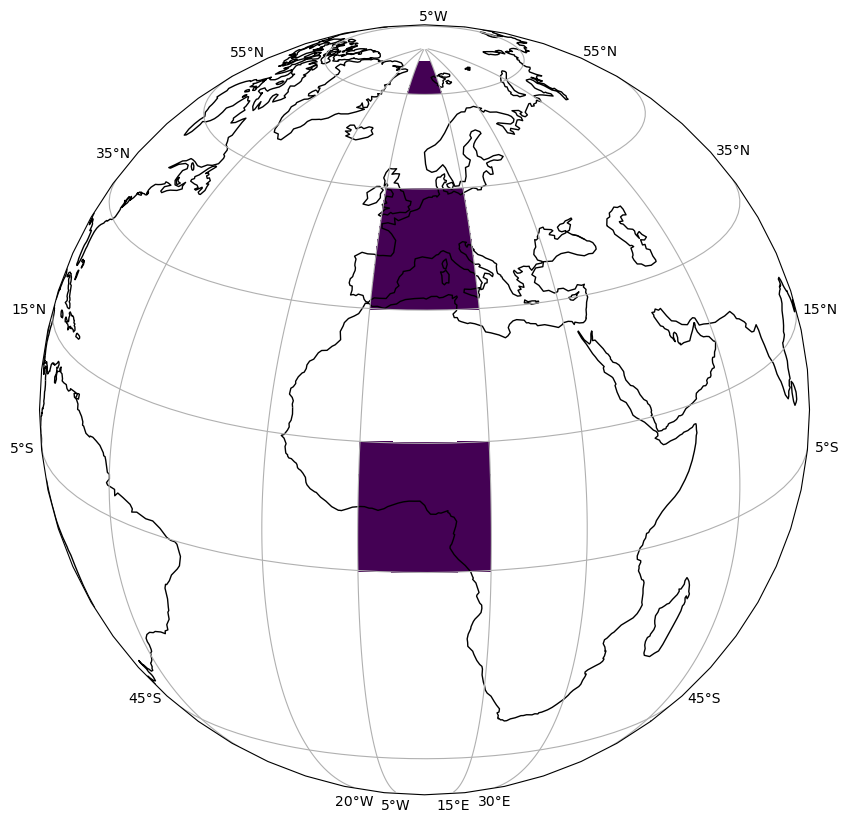

In [285]:
geostationary  = cartopy.crs.Geostationary(central_longitude=0, satellite_height=357858310,
                                           false_easting=0, false_northing=0, globe=None)
orthographic = cartopy.crs.Orthographic(central_longitude=5.0, central_latitude=20.0, globe=None)
platecarree = cartopy.crs.PlateCarree()
#grid_projection = map_projection
#data_projection = cartopy.crs.PlateCarree()

plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection = orthographic)
ax.set_global()
gl = ax.gridlines(crs = cartopy.crs.PlateCarree(), draw_labels=True)
# Pcolormesh ploting edges vs center
gl.xlocator = mticker.FixedLocator([-50, -20, -5, 15, 30, 60])
gl.ylocator = mticker.FixedLocator([-80, -45, -5, 15, 35, 55, 75, 90])
ax.coastlines()

x1 = np.array([0,10])
y1 = np.array([0,10])
X1, Y1 = np.meshgrid(x1, y1)
Z1 = np.ones_like(X1)
ax.pcolormesh(X1, Y1, Z1, transform = cartopy.crs.PlateCarree())

x2 = np.array([0,10])
y2 = np.array([40,50])
X2, Y2 = np.meshgrid(x2, y2)
Z2 = np.ones_like(X2)
ax.pcolormesh(X2, Y2, Z2, transform = cartopy.crs.PlateCarree())

x3 = np.array([0,10])
y3 = np.array([80,90])
X3, Y3 = np.meshgrid(x3, y3)
Z3 = np.ones_like(X3)
ax.pcolormesh(X3, Y3, Z3, transform = cartopy.crs.PlateCarree())

As this meridan convergence is only a result of the coordinate system but not dependend the location on earth, COSMO uses rotated coordinates. In this coordinate system, the North Pole is shifted in such a way that the equator of the rotated system aligns with the middle of the cpmutitional grid. By doing this, the effect of meridian convergence is reduced, and the grid cells can be treated as quasi-rectangular, which is important for the COSMO model's calculations.

To illustrate rotated coordinates, below is a plot of an example grid plotted in COSMO rotated coordinates, so with a shifted North Pole to `39.25°N 162.0°E`, and the same grid in unrotated coordinates, so with the North Pole at `90N 0E`.

In [292]:
print(f'COSMO rotated coordinates:')
np_lon = -162.0
np_lat = 39.25
rlon1D = np.linspace(-29,15,5)
rlat1D = np.linspace(-24.,20,5)
rlon2D, rlat2D = np.meshgrid(rlon1D, rlat1D)
print(f'rlon2D: \n{rlon2D}')
print(f'rlat2D: \n{rlat2D}')
print(f'\n')

print(f'Unrotated coordinates:')
urlat2D, urlon2D = sloth.coordTrafo.undo_grid_rotation(rlat=rlat2D, rlon=rlon2D, np_lat=np_lat, np_lon=np_lon)
print(f'urlon2D: \n{urlon2D}')
print(f'urlat2D: \n{urlat2D}')
print(f'\n')

COSMO rotated coordinates:
rlon2D: 
[[-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]
 [-29. -18.  -7.   4.  15.]]
rlat2D: 
[[-24. -24. -24. -24. -24.]
 [-13. -13. -13. -13. -13.]
 [ -2.  -2.  -2.  -2.  -2.]
 [  9.   9.   9.   9.   9.]
 [ 20.  20.  20.  20.  20.]]


Unrotated coordinates:
urlon2D: 
[[-10.35936993  -0.08066254  10.85915425  22.08830665  33.14970198]
 [-15.51110126  -3.59916283   9.40995869  22.92243904  36.14130389]
 [-21.871175    -8.17200123   7.46056311  24.04960343  40.07513592]
 [-30.3807953  -14.82252461   4.44120921  25.81094308  45.91597698]
 [-42.74871852 -26.01018472  -1.39654551  29.29334436  56.16698939]]
urlat2D: 
[[21.18614107 24.54915255 26.41216007 26.63948269 25.21352753]
 [31.17221883 35.11974877 37.34356143 37.61693    35.90950874]
 [40.90489431 45.55814849 48.25118256 48.5864432  46.50788476]
 [50.16902087 55.73075487 59.10775048 59.53876457 56.90575668]
 [58.52311664 65.29521618 69.828542

Text(0.5, 1.0, 'COSMO rotated coordinates')

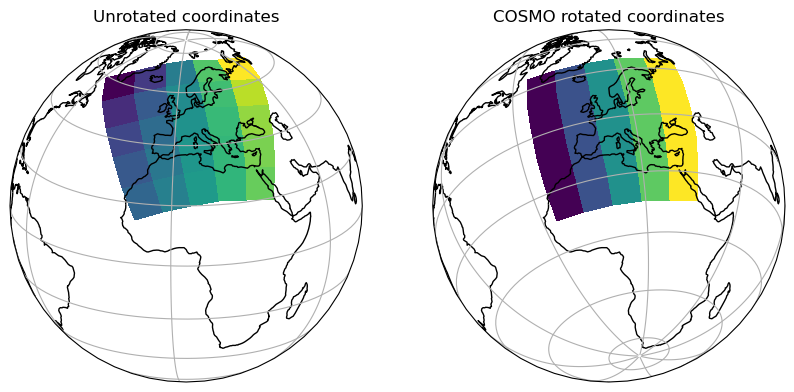

In [296]:
rotated_pole = cartopy.crs.RotatedPole(pole_latitude=np_lat, pole_longitude=np_lon)
orthographic = cartopy.crs.Orthographic(central_longitude=5.0, central_latitude=20.0, globe=None)

plt.figure(figsize=(10,10))

subID = [121, 122]
subTitle = ['unrotated lon', 'unrotated lat', 'original (rotated) lon', 'original (rotated) lat']
X = [urlon2D, rlon2D]
Y = [urlat2D, rlat2D]
Z = [urlon2D, rlon2D]
plot_sets = zip(X, Y, Z)

plot_set = next(plot_sets)
idx=0
ax = plt.subplot(subID[idx], projection = orthographic)
ax.set_global()
ax.gridlines(crs = cartopy.crs.PlateCarree())
ax.coastlines()
ax.pcolormesh(plot_set[0], plot_set[1], plot_set[2], transform = cartopy.crs.PlateCarree())
ax.set_title(f'Unrotated coordinates')

plot_set = next(plot_sets)
idx=1
ax = plt.subplot(subID[idx], projection=orthographic)
ax.set_global()
ax.gridlines(crs=rotated_pole)
ax.coastlines()
ax.pcolormesh(plot_set[0], plot_set[1], plot_set[2], transform=rotated_pole)
ax.set_title(f'COSMO rotated coordinates')

Ploting the same data on a `Mercator` projection

Text(0.5, 1.0, 'COSMO rotated coordinates')

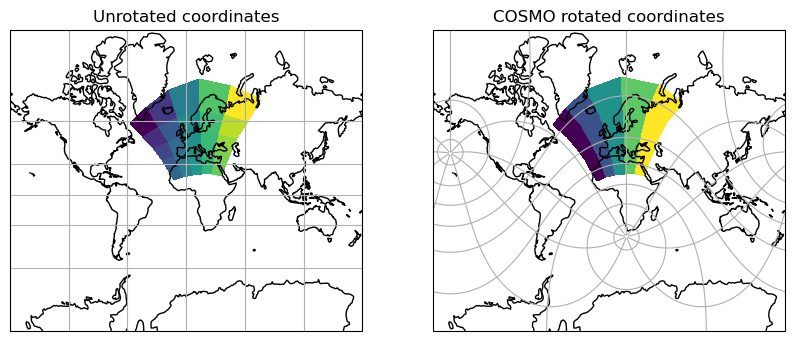

In [301]:
rotated_pole = cartopy.crs.RotatedPole(pole_latitude=np_lat, pole_longitude=np_lon)
Mercator = cartopy.crs.Mercator(central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0, globe=None, latitude_true_scale=0.0)

plt.figure(figsize=(10,10))

subID = [121, 122]
subTitle = ['unrotated lon', 'unrotated lat', 'original (rotated) lon', 'original (rotated) lat']
X = [urlon2D, rlon2D]
Y = [urlat2D, rlat2D]
Z = [urlon2D, rlon2D]
plot_sets = zip(X, Y, Z)

plot_set = next(plot_sets)
idx=0
ax = plt.subplot(subID[idx], projection = Mercator)
ax.set_global()
ax.gridlines(crs = cartopy.crs.PlateCarree())
ax.coastlines()
ax.pcolormesh(plot_set[0], plot_set[1], plot_set[2], transform = cartopy.crs.PlateCarree())
ax.set_title(f'Unrotated coordinates')

plot_set = next(plot_sets)
idx=1
ax = plt.subplot(subID[idx], projection = Mercator)
ax.set_global()
ax.gridlines(crs=rotated_pole)
ax.coastlines()
ax.pcolormesh(plot_set[0], plot_set[1], plot_set[2], transform=rotated_pole)
ax.set_title(f'COSMO rotated coordinates')